In [1]:
import os

In [2]:
os.chdir("../../data/snk/raw_videos")

In [2]:
import torch
from torchdata.datapipes.iter import FileLister, FileOpener
import torchvision
import imageio
import io
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader

In [ ]:
class ImageDataset(Dataset):
    """Image dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample


In [4]:
import matplotlib.pyplot as plt
def display_images(data, n_rows=3, n_cols=3):
    figure, axs = plt.subplots(n_rows, n_cols, figsize=(24, 12))

    axs = axs.flatten()

    plt.setp(axs, xticks=[], yticks=[])
    plt.subplots_adjust(wspace=0, hspace=0)

    for img, ax in zip(data, axs):
        ax.imshow(img)

    return figure

In [37]:
def decode(item):
    path, compressed_image = item
    image = imageio.imread(compressed_image.read())

    return path, image


normalize = T.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

preproc = T.Compose([
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    normalize,
])
    
datapipe1 = FileLister("../../data/snk/images/", "*.tar.gz")
datapipe2 = FileOpener(datapipe1, mode="b")
dataset = datapipe2.load_from_tar().map(decode).webdataset().to_tuple("jpg;png", "json").map_tuple(preproc, identity)
# images = []
# for obj in dataset:
    # key, val = obj.items()
    # image = val[1]
    # images.append(image)

AttributeError: 'WebDatasetIterDataPipe' object has no attribute 'to_tuple

In [42]:
def identity(element):
    return element

import webdataset as wds
transform = T.Compose(
                [
                    # T.RandomResizedCrop(224),
                    # T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    # self.normalize,
                ]
            )
dataset = (
            wds.WebDataset("../../data/snk/images/01.tar.gz", "../../data/snk/images/02.tar.gz")
            .shuffle(500)
            .decode("pil")
            .to_tuple("__key__ jpg;png;jpeg")
            .map_tuple(identity, transform)
            .batched(8, partial=False)
        )

In [43]:
dataloader = torch.utils.data.DataLoader(dataset, num_workers=0)

In [ ]:
for data in dataloader:
    print(data[0])

In [ ]:
display_images(images, 2, 4)
plt.show()

In [ ]:
# TODO improve from that: https://github.com/webdataset/webdataset-lightning/blob/main/train.py

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import sys
sys.path.append("../../")

In [28]:
from torchganime.data.image import ImageData

In [92]:
dataset = ImageData(["../../data/snk/images", "../../data/kny/images"])


training_urls =  ['../../data/snk/images/01.tar.gz', '../../data/snk/images/02.tar.gz', '../../data/snk/images/03.tar.gz', '../../data/snk/images/04.tar.gz', '../../data/snk/images/05.tar.gz', '../../data/snk/images/06.tar.gz', '../../data/snk/images/07.tar.gz', '../../data/snk/images/08.tar.gz', '../../data/snk/images/09.tar.gz', '../../data/snk/images/10.tar.gz', '../../data/snk/images/11.tar.gz', '../../data/snk/images/12.tar.gz', '../../data/snk/images/13.tar.gz', '../../data/snk/images/14.tar.gz', '../../data/snk/images/15.tar.gz', '../../data/snk/images/16.tar.gz', '../../data/snk/images/17.tar.gz', '../../data/snk/images/18.tar.gz', '../../data/snk/images/19.tar.gz', '../../data/snk/images/20.tar.gz', '../../data/snk/images/21.tar.gz', '../../data/snk/images/22.tar.gz', '../../data/snk/images/23.tar.gz', '../../data/snk/images/24.tar.gz', '../../data/snk/images/25.tar.gz', '../../data/snk/images/26.tar.gz', '../../data/kny/images/01.tar.gz', '../../data/kny/images/02.tar.gz', '.

In [93]:
i = 0
for data in dataset.train_dataloader():
    key, image = data
    i+= 1

KeyboardInterrupt: 

In [90]:
i 

380

In [87]:
dataset.train_dataloader().length * 64

9984

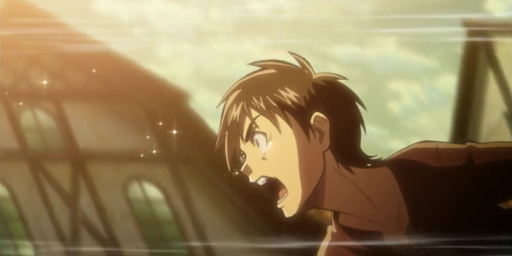

In [94]:
from torchvision.transforms import functional as F

F.to_pil_image((image[0] * 0.5) + 0.5)